In [90]:
import pandas as pd
df=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")

In [91]:
print(df)

           Date        Open        High         Low       Close     Volume
0      1/3/2006    6.999730    7.228929    6.987158    7.228929  201808600
1      1/4/2006    7.265678    7.347880    7.204753    7.250205  154900900
2      1/5/2006    7.236664    7.243433    7.132219    7.193145  112355600
3      1/6/2006    7.277282    7.417508    7.209586    7.378825  176114400
4      1/9/2006    7.420411    7.465863    7.324670    7.354649  168760200
...         ...         ...         ...         ...         ...        ...
3100  4/27/2018  164.000000  164.330002  160.630005  162.320007   35655800
3101  4/30/2018  162.130005  167.259995  161.839996  165.259995   42427400
3102   5/1/2018  166.410004  169.199997  165.270004  169.100006   53569400
3103   5/2/2018  175.229996  177.750000  173.800003  176.570007   66539400
3104   5/3/2018  175.880005  177.500000  174.440002  176.889999   33855800

[3105 rows x 6 columns]


In [92]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

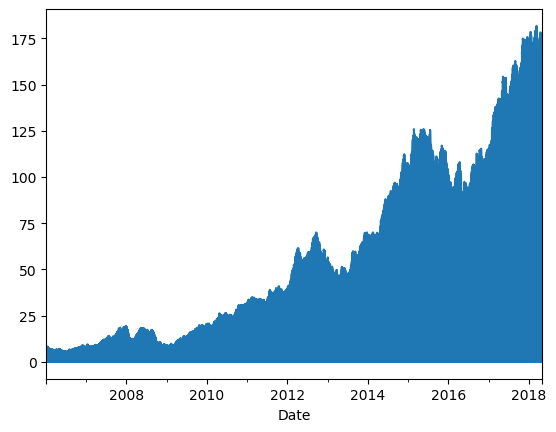

In [93]:
df.resample('1D').sum()['Close'].plot()

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [116]:
training_dataset=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")

In [117]:
print (training_dataset.isnull().sum())
total_null = training_dataset.isnull().sum().sum()
print ("The total number of null values is: " + str(total_null))

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
The total number of null values is: 0


In [97]:
#training_dataset.drop(['Volume'],axis=1,inplace=True)

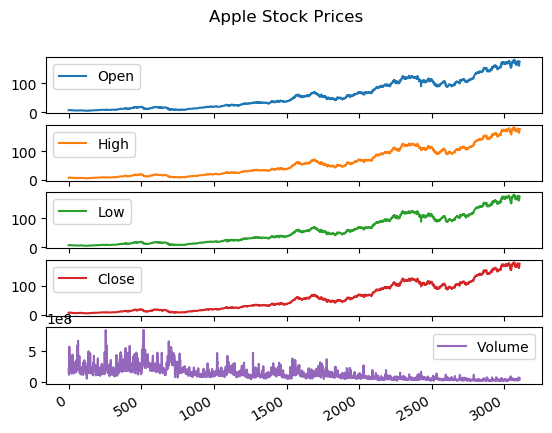

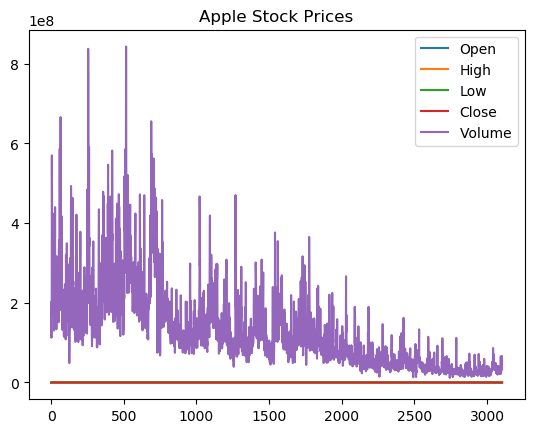

In [118]:
training_dataset.plot.line(subplots = True, title='Apple Stock Prices')
training_dataset.plot(title='Apple Stock Prices')

In [99]:
training_dataset.drop(['High', 'Low','Open'], axis = 1, inplace = True)

In [100]:
training_dataset

,Date,Close
0,1/3/2006,7.228929
1,1/4/2006,7.250205
2,1/5/2006,7.193145
3,1/6/2006,7.378825
4,1/9/2006,7.354649
...,...,...
3100,4/27/2018,162.320007
3101,4/30/2018,165.259995
3102,5/1/2018,169.100006
3103,5/2/2018,176.570007


In [102]:
import numpy as np
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

In [103]:
OHLC_avg = df.mean(axis = 1)
HLC_avg = df[['High', 'Low', 'Close']].mean(axis = 1)
close_val = df[['Close']]
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) 
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [104]:
input_size = trainX.shape[1]
hidden_size=1000
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [110]:
def relu(x):
    return np.maximum(x, 0, x)

def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [111]:
from scipy import linalg
output_weights = np.dot(linalg.pinv2(hidden_nodes(trainX)), trainY)

In [112]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [124]:
prediction = predict(testX)
correct = 0
total = testX.shape[0]
for i in range(total):
    predicted = prediction[i]
    actual = testY[i]
    correct += 1 if predicted == actual else 0

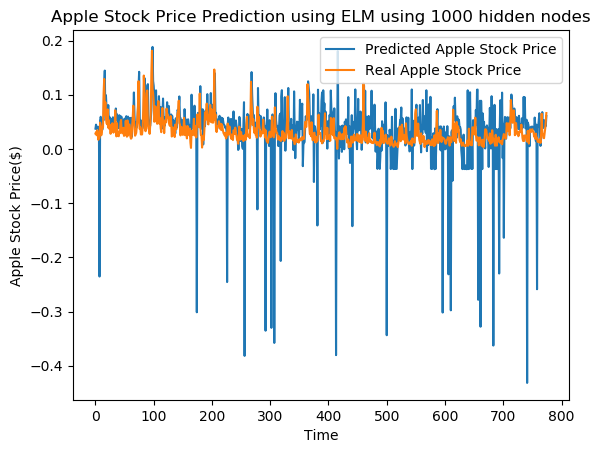

In [125]:
from matplotlib import pyplot as plt
#Graph the real stock prices against the model's prediction
plt.plot(prediction, label = 'Predicted Apple Stock Price', linewidth = 1.5)
plt.plot(testY, label = 'Real Apple Stock Price', linewidth = 1.5)
plt.title("Apple Stock Price Prediction using ELM using 1000 hidden nodes")
plt.xlabel('Time')
plt.ylabel('Apple Stock Price($)')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(testY,prediction) 

0.003954467731459492

Enter the full file path of the csv file of the data you want to find the gra of.
            Open        High         Low       Close     Volume
0       6.999730    7.228929    6.987158    7.228929  201808600
1       7.265678    7.347880    7.204753    7.250205  154900900
2       7.236664    7.243433    7.132219    7.193145  112355600
3       7.277282    7.417508    7.209586    7.378825  176114400
4       7.420411    7.465863    7.324670    7.354649  168760200
...          ...         ...         ...         ...        ...
3100  164.000000  164.330002  160.630005  162.320007   35655800
3101  162.130005  167.259995  161.839996  165.259995   42427400
3102  166.410004  169.199997  165.270004  169.100006   53569400
3103  175.229996  177.750000  173.800003  176.570007   66539400
3104  175.880005  177.500000  174.440002  176.889999   33855800

[3105 rows x 5 columns]
How many Max Normalization column you got:1
Max Normalization column names :Close
-------------------------------------------

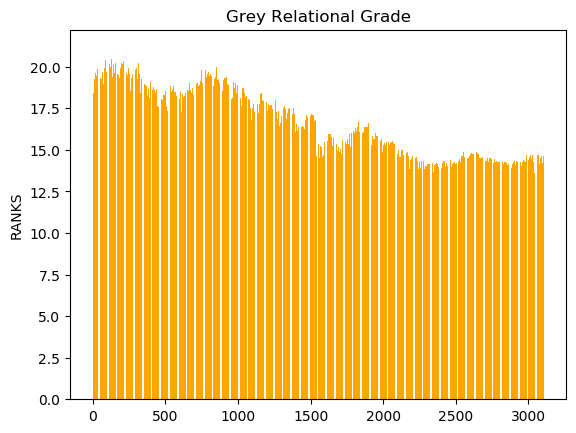

In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

import pandas as pd
df1=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
csv=df1.drop(['Date'],axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
print(csv)
ColsSize = int(input("How many Max Normalization column you got:"))
ListsEbe = []
for i in range(ColsSize):
    Ebeis = input("Max Normalization column names :")
    ListsEbe.append(Ebeis)
X = csv.drop(ListsEbe,axis=1)
Adding = []
for z in range(len(ListsEbe)):
    Max = csv[ListsEbe[z]].max()
    Min = csv[ListsEbe[z]].min()
    Fark = Max - Min
    Normalized = ((csv[ListsEbe[z]] - Min) / Fark)
    Adding.append(1 - Normalized)

EbeiDataFrame = pd.DataFrame(Adding)
csv.to_excel('İnputTable.xlsx')
Scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(Scaled)
df.to_excel('ScaledData.xlsx')

"""
Calculate Grey Relational Coefficient
"""
List = []
for p in range(len(ListsEbe)):
    List.append(p)
EbeiDataFrameT = EbeiDataFrame.T
EbeiDataFrameT.columns = List 
Renamed = EbeiDataFrameT
countEb = len(EbeiDataFrameT.columns)
Sequence_list2 = []
DeltaMin= 0
DeltaMax = 1
Theta = 0.5
cap = []
for i in range(countEb):
    df_Drop_z = Renamed[i]
    df_Drop_z_Max = df_Drop_z.max()
    df_Drop_z_Min = df_Drop_z.min()
    Standart_Deviation_Sequence = []
    Standart_Deviation_b = df_Drop_z_Max - df_Drop_z
    pow_Total = DeltaMin + Theta
    inline_Total = (Theta * df_Drop_z_Max) + df_Drop_z
    GreyRelationalCoefficient = (((Theta * df_Drop_z_Max) + df_Drop_z_Min) / (df_Drop_z + (Theta * df_Drop_z_Max)))
  
    Sequence_list2.append(GreyRelationalCoefficient)
DataFrameCoefficient3 = pd.DataFrame(Sequence_list2)
DataFrameTransposed4 = DataFrameCoefficient3.T 




count = len(df.columns)
count2 = count
Sequence_list = []
DeltaMin= 0
DeltaMax = 1
Theta = 0.5
cap = []
for i in range(count):
    df_Drop_a = df[i]
    df_Drop_a_Max = df_Drop_a.max()
    df_Drop_a_Min = df_Drop_a.min()
    Standart_Deviation_Sequence = []
    Standart_Deviation_b = df_Drop_a_Max - df_Drop_a
    pow_Total = DeltaMin + Theta
    inline_Total = (Theta * df_Drop_a_Max) + df_Drop_a
    GreyRelationalCoefficient = (((Theta * df_Drop_a_Max) + df_Drop_a_Min) / (df_Drop_a + (Theta * df_Drop_a_Max)))
  
    Sequence_list.append(GreyRelationalCoefficient)
DataFrameCoefficient = pd.DataFrame(Sequence_list)
DataFrameTransposed = DataFrameCoefficient.T 
DataFrameTransposed2 = DataFrameCoefficient.T 
for v in range(len(Adding)):
    DataFrameTransposed[count2] = DataFrameTransposed4[v]
    count2 = count2 + 1

DataFrameTransposed.to_excel('GrayRelationalAnalysisCoefficient.xlsx')
print("-------------------------------------------------------------------------------------")
print("The maximum normalization columns you select are added to the bottom of the list. You should pay attention to this when giving your column weights.")
print("-------------------------------------------------------------------------------------")
print(DataFrameTransposed)
CountFor = len(DataFrameTransposed.columns)
Total = np.zeros((CountFor,1))
Totals = 0
for x in range(CountFor):
    w = float(input("Give Weights for Each Columns:"))
    DataFrameColumnSums = DataFrameTransposed[x]
    Columns = DataFrameColumnSums * w 
    DataFrameTransposed[x] = Columns
DataFrameTransposed['RANK'] = DataFrameTransposed.sum(axis=1)
DataFrameTransposed.to_excel('GreyRelationalRank.xlsx')
print(DataFrameTransposed)

""" Plotting GRA RANK  """

Counting = len(DataFrameTransposed.index)
y_pos = np.arange(Counting)
performance = DataFrameTransposed['RANK']
plt.bar(y_pos,performance, color='orange' )
plt.ylabel('RANKS')
plt.title('Grey Relational Grade')
plt.savefig('GRA')
plt.show()



##### GreyRelationalCoefficient

In [123]:
GCDA=np.sum(DataFrameTransposed/total)
GCDA

0       13.843470
1       13.832106
2       13.826836
3       16.106955
4        9.008646
RANK    66.618013
dtype: float64

#### df2=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
df3=df2.drop(['Date','High','Low','Open','Volume'],axis=1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

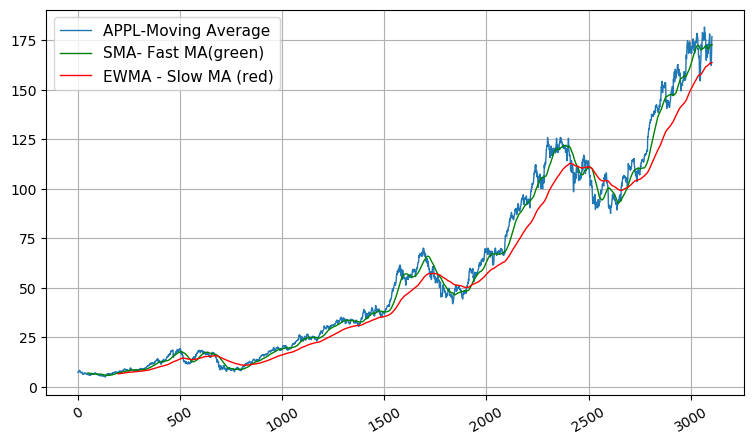

In [27]:
# Moving Averages Code

# Load the necessary packages and modules
import matplotlib.pyplot as plt
import pandas as pd

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

data = pd.DataFrame(df2) 
close = data['Close']

n = 50
SMA_APPL = SMA(data,n)
SMA_APPL = SMA_APPL.dropna()
SMA = SMA_APPL['SMA']

ew = 200
EWMA_APPL = EWMA(data,ew)
EWMA_APPL = EWMA_APPL.dropna()
EWMA = EWMA_APPL['EWMA_200']
plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1, label='APPL-Moving Average')
plt.plot(SMA,'g',lw=1, label='SMA- Fast MA(green)')
plt.plot(EWMA,'r', lw=1, label='EWMA - Slow MA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

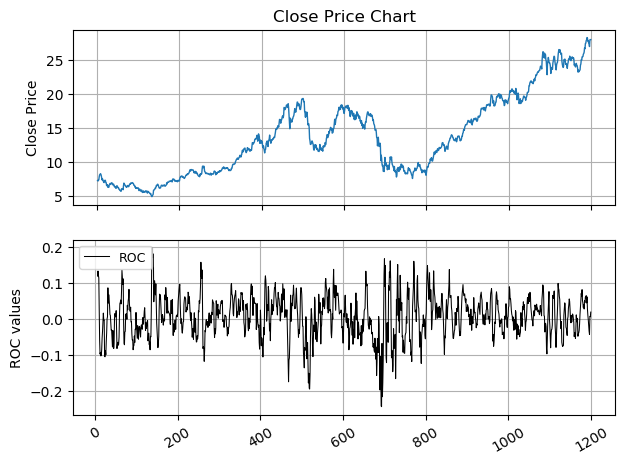

In [119]:
# Rate of Change (ROC)
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='Rate of Change')
 data = data.join(ROC)
 return data 
 

data = pd.DataFrame(df2)
n = 5
NIFTY_ROC = ROC(data,n)
ROC = NIFTY_ROC['Rate of Change']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('Close Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

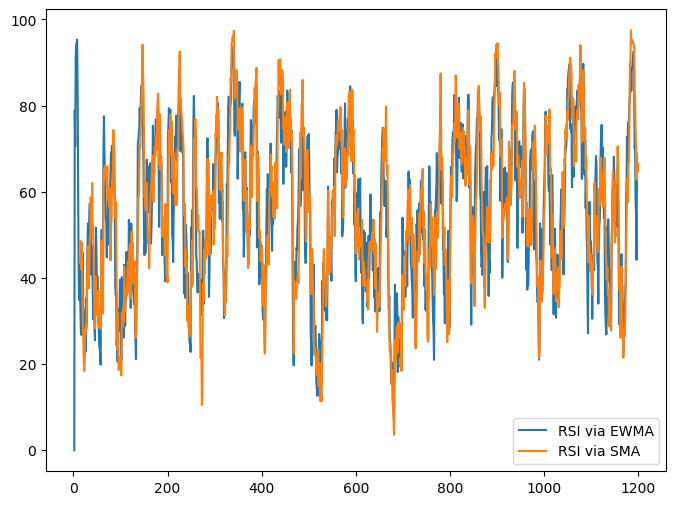

In [29]:
import pandas
import datetime
import matplotlib.pyplot as plt

# Window length for moving average
window_length = 14

df2=df2.iloc[1:1200]
# Get just the adjusted close
close = df2['Close']
# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

# Compare graphically
plt.figure(figsize=(8, 6))
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


          Date      Open      High       Low     Close     Volume  \
1     1/4/2006  7.265678  7.347880  7.204753  7.250205  154900900   
2     1/5/2006  7.236664  7.243433  7.132219  7.193145  112355600   
3     1/6/2006  7.277282  7.417508  7.209586  7.378825  176114400   
4     1/9/2006  7.420411  7.465863  7.324670  7.354649  168760200   
5    1/10/2006  7.373992  7.919425  7.333374  7.819816  569967300   
..         ...       ...       ...       ...       ...        ...   
295   3/8/2007  8.567368  8.579940  8.458088  8.510310  127752800   
296   3/9/2007  8.587676  8.592511  8.452284  8.507407  112959000   
297  3/12/2007  8.517080  8.702759  8.509343  8.691155  182352100   
298  3/13/2007  8.646668  8.761750  8.548993  8.548993  216972700   
299  3/14/2007  8.568338  8.703729  8.502577  8.703729  199146500   

     UpperBoundary_of_30_day_CP  LowerBoundary_of_30_day_CP  
1                           NaN                         NaN  
2                           NaN                

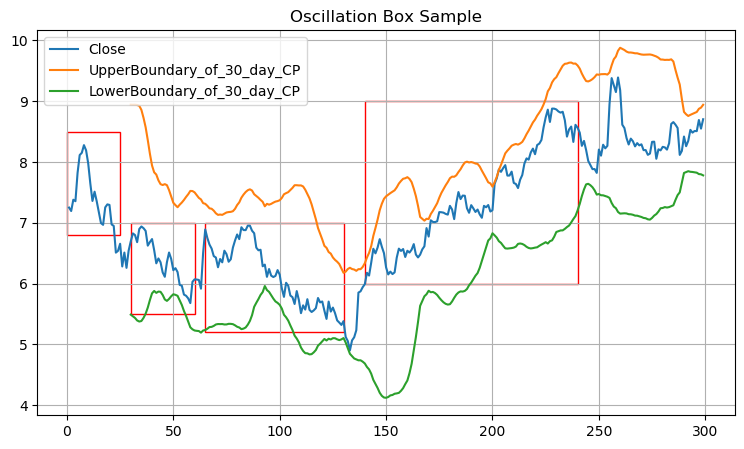

In [30]:
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

dataf=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
dataf2=dataf.iloc[1:300]
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['UpperBoundary_of_30_day_CP'] = MA + (3 * SD) 
    data['LowerBoundary_of_30_day_CP'] = MA - (3 * SD)
    return data
 

n = 30
APPL_BBANDS = BBANDS(dataf2, n)
print(APPL_BBANDS)

# Create the plot
currentAxis=pd.concat([APPL_BBANDS.Close,APPL_BBANDS.UpperBoundary_of_30_day_CP,APPL_BBANDS.LowerBoundary_of_30_day_CP],axis=1).plot(figsize=(9,5),grid=True)
plt.title("Oscillation Box Sample")

margin = .1
min_f0,min_f1,max_f0,max_f1=0,6.8,25,8.5
min_f2,min_f3,max_f2,max_f3=30,5.5,60,7
min_f4,min_f5,max_f4,max_f5=65,5.2,130,7
min_f6,min_f7,max_f6,max_f7=140,6,240,9
width = max_f0 - min_f0
height = max_f1 - min_f1
width1 = max_f2 - min_f2
height2 = max_f3 - min_f3
width3 = max_f4 - min_f4
height3 = max_f5 - min_f5
width4 = max_f6 - min_f6
height4 = max_f7 - min_f7
currentAxis.add_patch(
   patches.Rectangle(
        xy=(min_f0, min_f1),  # point of origin.
        width=width,
        height=height,
        linewidth=1,
        color='red',
        fill=False
    )
)
currentAxis.add_patch(
   patches.Rectangle(
        xy=(min_f2, min_f3),  # point of origin.
        width=width1,
        height=height2,
        linewidth=1,
        color='red',
        fill=False
    )
)
currentAxis.add_patch(
   patches.Rectangle(
        xy=(min_f4, min_f5),  # point of origin.
        width=width3,
        height=height3,
        linewidth=1,
        color='red',
        fill=False
    )
)
currentAxis.add_patch(
   patches.Rectangle(
        xy=(min_f6, min_f7),  # point of origin.
        width=width4,
        height=height4,
        linewidth=1,
        color='red',
        fill=False
    )
)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


          Date      Open      High       Low     Close     Volume  \
1     1/4/2006  7.265678  7.347880  7.204753  7.250205  154900900   
2     1/5/2006  7.236664  7.243433  7.132219  7.193145  112355600   
3     1/6/2006  7.277282  7.417508  7.209586  7.378825  176114400   
4     1/9/2006  7.420411  7.465863  7.324670  7.354649  168760200   
5    1/10/2006  7.373992  7.919425  7.333374  7.819816  569967300   
..         ...       ...       ...       ...       ...        ...   
295   3/8/2007  8.567368  8.579940  8.458088  8.510310  127752800   
296   3/9/2007  8.587676  8.592511  8.452284  8.507407  112959000   
297  3/12/2007  8.517080  8.702759  8.509343  8.691155  182352100   
298  3/13/2007  8.646668  8.761750  8.548993  8.548993  216972700   
299  3/14/2007  8.568338  8.703729  8.502577  8.703729  199146500   

     UpperBoundary_of_30_day_CP  LowerBoundary_of_30_day_CP  
1                           NaN                         NaN  
2                           NaN                

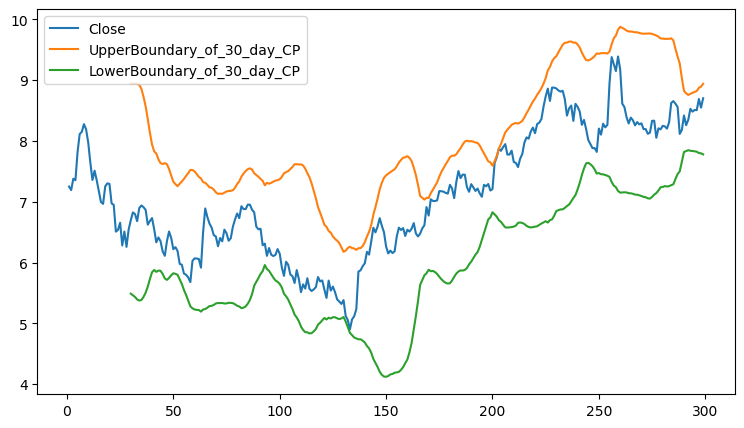

In [121]:
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

dataf=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
dataf2=dataf.iloc[1:300]
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['UpperBoundary_of_30_day_CP'] = MA + (3 * SD) 
    data['LowerBoundary_of_30_day_CP'] = MA - (3 * SD)
    return data
 

n = 30
APPL_BBANDS = BBANDS(dataf2, n)
print(APPL_BBANDS)

# Create the plot
currentAxis=pd.concat([APPL_BBANDS.Close,APPL_BBANDS.UpperBoundary_of_30_day_CP,APPL_BBANDS.LowerBoundary_of_30_day_CP],axis=1).plot(figsize=(9,5))

In [31]:
dataframe=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
dataframe=dataframe['Close']
dataframe

SMA30 = dataframe.rolling(window=30).mean()
SMA30
SMA100 = dataframe.rolling(window=100).mean()
SMA100
def buy_sell(signal):
    
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
        if signal['SMA30'][i] > signal['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(signal['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        #print('Buy')
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            if flag != 0:
                sigPriceSell.append(signal['Close'][i])
                sigPriceBuy.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        #print('sell')
        else: #Handling nan values
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
  
    return (sigPriceBuy, sigPriceSell)

In [32]:
dataframe1=pd.read_csv("/Users/ananya/Desktop/AAPL.csv")
signal=dataframe1['Close']
signal=pd.DataFrame(signal)

In [33]:
SMA30=pd.DataFrame(SMA30)
signal['SMA30']=SMA30['Close']
SMA100=pd.DataFrame(SMA100)
signal['SMA100']=SMA100['Close']

In [34]:
signal

,Close,SMA30,SMA100
0,7.228929,NaN,NaN
1,7.250205,NaN,NaN
2,7.193145,NaN,NaN
3,7.378825,NaN,NaN
4,7.354649,NaN,NaN
...,...,...,...
3100,162.320007,170.341668,171.396991
3101,165.259995,169.916334,171.358485
3102,169.100006,169.709668,171.359974
3103,176.570007,169.754001,171.442437


In [35]:
x = buy_sell(signal)
signal['Buy'] = x[0]
signal['Sell'] = x[1]
signal['Upper']=APPL_BBANDS['UpperBoundary_of_30_day_CP']
signal['Lower']=APPL_BBANDS['LowerBoundary_of_30_day_CP']

In [36]:
signal

,Close,SMA30,SMA100,Buy,Sell,Upper,Lower
0,7.228929,NaN,NaN,NaN,NaN,NaN,NaN
1,7.250205,NaN,NaN,NaN,NaN,NaN,NaN
2,7.193145,NaN,NaN,NaN,NaN,NaN,NaN
3,7.378825,NaN,NaN,NaN,NaN,NaN,NaN
4,7.354649,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3100,162.320007,170.341668,171.396991,NaN,NaN,NaN,NaN
3101,165.259995,169.916334,171.358485,NaN,NaN,NaN,NaN
3102,169.100006,169.709668,171.359974,NaN,NaN,NaN,NaN
3103,176.570007,169.754001,171.442437,NaN,NaN,NaN,NaN


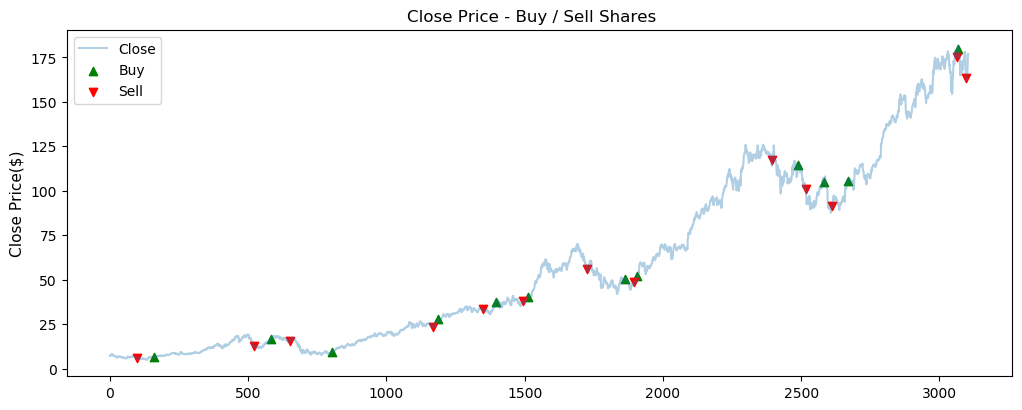

In [37]:
title = 'Close Price - Buy / Sell Shares   '
my_stocks = signal
ticker = 'Close'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy'], color = 'green', label='Buy', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell'], color = 'red', label='Sell', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.ylabel('Close Price($)',fontsize=11)
plt.legend( loc='upper left')
plt.show()

In [38]:
#OSELM
import numpy as np
from numpy.linalg import pinv


def sigmoidActFunc(features, weights, bias):
    
    assert(features.shape[1] == weights.shape[1])
    (numSamples, numInputs) = features.shape
    (numHiddenNeuron, numInputs) = weights.shape
    V = np.dot(features, np.transpose(weights))
    for i in range(numHiddenNeuron):
        V[:, i] += bias[0, i]
    H = 1 / (1+np.exp(-V))
    return H

class OSELM(object):
    def __init__(self, inputs, outputs, numHiddenNeurons, activationFunction):

        self.activationFunction = activationFunction
        self.inputs = inputs
        self.outputs = outputs
        self.numHiddenNeurons = numHiddenNeurons

    # input to hidden weights
        self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
    # bias of hidden units
        self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
    # hidden to output layer connection
        self.beta = np.random.random((self.numHiddenNeurons, self.outputs))

    # auxiliary matrix used for sequential learning
        self.M = None


    def calculateHiddenLayerActivation(self, features):
        if self.activationFunction is "sig":
            H = sigmoidActFunc(features, self.inputWeights, self.bias)
        else:
            print(" Unknown activation function type")
            raise NotImplementedError
        return H


    def initializePhase(self, features, targets):
        assert features.shape[0] == targets.shape[0]
        assert features.shape[1] == self.inputs
        assert targets.shape[1] == self.outputs

    # randomly initialize the input->hidden connections
        self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
        self.inputWeights = self.inputWeights * 2 - 1

        if self.activationFunction is "sig":
            self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
        else:
            print(" Unknown activation function type")
            raise NotImplementedError

        H0 = self.calculateHiddenLayerActivation(features)
        self.M = pinv(np.dot(np.transpose(H0), H0))
        self.beta = np.dot(pinv(H0), targets)


    def train(self, features, targets):

        (numSamples, numOutputs) = targets.shape
        assert features.shape[0] == targets.shape[0]

        H = self.calculateHiddenLayerActivation(features)
        Ht = np.transpose(H)
        try:
            self.M -= np.dot(self.M,
                        np.dot(Ht, np.dot(pinv(np.eye(numSamples) + np.dot(H, np.dot(self.M, Ht))),np.dot(H, self.M))))

            self.beta += np.dot(self.M, np.dot(Ht, targets - np.dot(H, self.beta)))
        except np.linalg.linalg.LinAlgError:
            print("SVD not converge, ignore the current training cycle")
    # else:
    #   raise RuntimeError

    def predict(self, features):

        H = self.calculateHiddenLayerActivation(features)
        prediction = np.dot(H, self.beta)
        return prediction

In [39]:
def getTimeEmbeddedMatrix(sequence, numLags, predictionStep=1):
    print("generate time embedded matrix ")
    inDim = numLags
    X = np.zeros(shape=(len(sequence), inDim))
    T = np.zeros(shape=(len(sequence), 1))
    for i in range(numLags - 1, len(sequence) - predictionStep):
        X[i, :] = np.array(sequence['Close'][(i - numLags + 1):(i + 1)])
        T[i, :] = sequence['Close'][i + predictionStep]
    return (X, T)

In [40]:
sequence = pd.read_csv('/Users/ananya/Desktop/AAPL.csv')
meanSeq = np.mean(sequence['Close'])
stdSeq = np.std(sequence['Close'])
sequence['Close'] = (sequence['Close'] - meanSeq) / stdSeq
(X, T) = getTimeEmbeddedMatrix(sequence, 171, 1)

generate time embedded matrix 


In [41]:
def initializeNet(nDimInput, nDimOutput, min_t, max_t, numNeurons, algorithm='OSELM',
                  LN=True, InWeightFF=0.999, OutWeightFF=0.999, HiddenWeightFF=0.999,
                  ORTH=True, AE=True, PRINTING=True):
    net = OSELM(nDimInput, nDimOutput,
                    numHiddenNeurons=numNeurons,
                    activationFunction='sig')
    return net

In [42]:
net=initializeNet(nDimInput=X.shape[1],
                        nDimOutput=1,
                        numNeurons=69,
                        algorithm='OSELM',
                        min_t=171,
                        max_t=X.shape[0],
                        LN=True,
                        InWeightFF=0.999,
                        OutWeightFF=0.990,
                        HiddenWeightFF=0.999,
                        AE=True,
                        ORTH=False)

In [43]:
net.initializePhase(X,T)

In [44]:
predictedInput = np.zeros((len(sequence),))
targetInput = np.zeros((len(sequence),))
trueData = np.zeros((len(sequence),))
numLags=171
predictionStep=1
for i in range(numLags, len(sequence) - predictionStep - 1):
    net.train(X[[i], :], T[[i], :])
    Y = net.predict(X[[i + 1], :])

    predictedInput[i + 1] = Y[-1]
    targetInput[i + 1] = sequence['Close'][i + 1 + predictionStep]
    trueData[i + 1] = sequence['Close'][i + 1]
    if Y[-1] > 5:
        #print("Output has diverged, terminate the process")
        predictedInput[(i + 1):] = 10000
        break

In [45]:
meanSeq = np.mean(sequence['Close'])
stdSeq = np.std(sequence['Close'])
    # Reconstruct original value
predictedInput = (predictedInput * stdSeq) + meanSeq
targetInput = (targetInput * stdSeq) + meanSeq
trueData = (trueData * stdSeq) + meanSeq

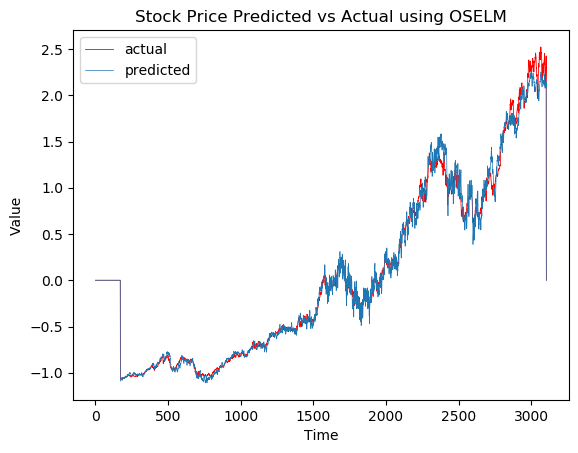

In [46]:
from matplotlib import pyplot as plt
targetPlot, = plt.plot(targetInput, label='actual', color='red',linewidth=0.6)
predictedPlot, = plt.plot(predictedInput, label='predicted',linewidth=0.5)
plt.legend(handles=[targetPlot, predictedPlot])
plt.title("Stock Price Predicted vs Actual using OSELM")
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(targetInput,predictedInput) 

0.008012925001656304

In [48]:
#ORELM
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv

def orthogonalization(Arr):
    [Q, S, _] = np.linalg.svd(Arr)
    tol = max(Arr.shape) * np.spacing(max(S))
    r = np.sum(S > tol)
    Q = Q[:, :r]

    return Q


def linear(features, weights, bias):
    assert features.shape[1] == weights.shape[1]
    (numSamples, numInputs) = features.shape
    (numHiddenNeuron, numInputs) = weights.shape
    V = np.dot(features, np.transpose(weights)) + bias

    # for i in range(numHiddenNeuron):
    #  V[:, i] += bias[0, i]

    return V


def sigmoidActFunc(V):
    H = 1 / (1 + np.exp(-V))
    return H


class FOSELM(object):
    def __init__(
        self,
        inputs,
        outputs,
        numHiddenNeurons,
        activationFunction,
        LN=False,
        forgettingFactor=0.999,
        ORTH=False,
        RLS=False,
    ):

        self.activationFunction = activationFunction
        self.inputs = inputs
        self.outputs = outputs
        self.numHiddenNeurons = numHiddenNeurons

        # input to hidden weights
        self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
        self.ORTH = ORTH

        # bias of hidden units
        self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
        # hidden to output layer connection
        self.beta = np.random.random((self.numHiddenNeurons, self.outputs))
        self.LN = LN
        # auxiliary matrix used for sequential learning
        self.M = None
        self.forgettingFactor = forgettingFactor
        self.RLS = RLS

    def layerNormalization(self, H, scaleFactor=1, biasFactor=0):

        H_normalized = (H - H.mean()) / (np.sqrt(H.var() + 0.0001))
        H_normalized = scaleFactor * H_normalized + biasFactor

        return H_normalized

    def calculateHiddenLayerActivation(self, features):
        if self.activationFunction is "sig":
            V = linear(features, self.inputWeights, self.bias)
            if self.LN:
                V = self.layerNormalization(V)
            H = sigmoidActFunc(V)
        else:
            print(" Unknown activation function type")
            raise NotImplementedError

        return H

    def initializePhase(self, lamb=0.0001):
        # randomly initialize the input->hidden connections
        self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
        self.inputWeights = self.inputWeights * 2 - 1

        if self.ORTH:
            if self.numHiddenNeurons > self.inputs:
                self.inputWeights = orthogonalization(self.inputWeights)
            else:
                self.inputWeights = orthogonalization(self.inputWeights.transpose())
                self.inputWeights = self.inputWeights.transpose()

        if self.activationFunction is "sig":
            self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
        else:
            print(" Unknown activation function type")
            raise NotImplementedError

        self.M = inv(lamb * np.eye(self.numHiddenNeurons))
        self.beta = np.zeros([self.numHiddenNeurons, self.outputs])

    def train(self, features, targets):
        (numSamples, numOutputs) = targets.shape
        assert features.shape[0] == targets.shape[0]

        H = self.calculateHiddenLayerActivation(features)
        Ht = np.transpose(H)

        if self.RLS:

            self.RLS_k = np.dot(
                np.dot(self.M, Ht),
                inv(
                    self.forgettingFactor * np.eye(numSamples)
                    + np.dot(H, np.dot(self.M, Ht))
                ),
            )
            self.RLS_e = targets - np.dot(H, self.beta)
            self.beta = self.beta + np.dot(self.RLS_k, self.RLS_e)
            self.M = (
                1
                / (self.forgettingFactor)
                * (self.M - np.dot(self.RLS_k, np.dot(H, self.M)))
            )

        else:
            self.M = (1 / self.forgettingFactor) * self.M - np.dot(
                (1 / self.forgettingFactor) * self.M,
                np.dot(
                    Ht,
                    np.dot(
                        pinv(
                            np.eye(numSamples)
                            + np.dot(
                                H, np.dot((1 / self.forgettingFactor) * self.M, Ht)
                            )
                        ),
                        np.dot(H, (1 / self.forgettingFactor) * self.M),
                    ),
                ),
            )
            self.beta = self.beta + np.dot(
                self.M, np.dot(Ht, targets - np.dot(H, self.beta))
            )
            # self.beta = (self.forgettingFactor)*self.beta + np.dot(self.M, np.dot(Ht, targets - np.dot(H, (self.forgettingFactor)*self.beta)))
            # self.beta = (self.forgettingFactor)*self.beta + (self.forgettingFactor)*np.dot(self.M, np.dot(Ht, targets - np.dot(H, self.beta)))

    def predict(self, features):
        H = self.calculateHiddenLayerActivation(features)
        prediction = np.dot(H, self.beta)
        return prediction

In [82]:
def orthogonalization(Arr):
    
    [Q, S, _] = np.linalg.svd(Arr)
    tol = max(Arr.shape) * np.spacing(max(S))
    r = np.sum(S > tol)
    Q = Q[:, :r]


def sigmoidActFunc(features, weights, bias):
    
    assert(features.shape[1] == weights.shape[1])
    (numSamples, numInputs) = features.shape
    (numHiddenNeuron, numInputs) = weights.shape
    V = np.dot(features, np.transpose(weights))
    for i in range(numHiddenNeuron):
        V[:, i] += bias[0, i]
    H = 1 / (1+np.exp(-V))
    return H


def linear_recurrent(features, inputW,hiddenW,hiddenA, bias):
    (numSamples, numInputs) = features.shape
    (numHiddenNeuron, numInputs) = inputW.shape
    V = np.dot(features, np.transpose(inputW)) + np.dot(hiddenA,hiddenW)
    for i in range(numHiddenNeuron):
        V[:, i] += bias[0, i]

    return V

def sigmoidAct_forRecurrent(features,inputW,hiddenW,hiddenA,bias):
    (numSamples, numInputs) = features.shape
    (numHiddenNeuron, numInputs) = inputW.shape
    V = np.dot(features, np.transpose(inputW)) + np.dot(hiddenA,hiddenW)
    for i in range(numHiddenNeuron):
        V[:, i] += bias[0, i]
    H = 1 / (1 + np.exp(-V))
    return H

def sigmoidActFunc(V):
    H = 1 / (1+np.exp(-V))
    return H


class ORELM(object):
    def __init__(self, inputs, outputs, numHiddenNeurons, activationFunction, LN=True, AE=True, ORTH=True,
               inputWeightForgettingFactor=0.999,
               outputWeightForgettingFactor=0.999,
               hiddenWeightForgettingFactor=0.999):

        self.activationFunction = activationFunction
        self.inputs = inputs
        self.outputs = outputs
        self.numHiddenNeurons = numHiddenNeurons

    # input to hidden weights
        self.inputWeights  = np.random.random((self.numHiddenNeurons, self.inputs))
    # hidden layer to hidden layer wieghts
        self.hiddenWeights = np.random.random((self.numHiddenNeurons, self.numHiddenNeurons))
    # initial hidden layer activation
        self.initial_H = np.random.random((1, self.numHiddenNeurons)) * 2 -1
        self.H = self.initial_H
        self.LN = LN
        self.AE = AE
        self.ORTH = ORTH
    # bias of hidden units
        self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
    # hidden to output layer connection
        self.beta = np.random.random((self.numHiddenNeurons, self.outputs))

    # auxiliary matrix used for sequential learning
        self.M = inv(0.00001 * np.eye(self.numHiddenNeurons))

        self.forgettingFactor = outputWeightForgettingFactor

        self.trace=0
        self.thresReset=0.001


        if self.AE:
            self.inputAE = FOSELM(inputs = inputs,
                            outputs = inputs,
                            numHiddenNeurons = numHiddenNeurons,
                            activationFunction = activationFunction,
                            LN= LN,
                            forgettingFactor=inputWeightForgettingFactor,
                            ORTH = ORTH
                            )

            self.hiddenAE = FOSELM(inputs = numHiddenNeurons,
                             outputs = numHiddenNeurons,
                             numHiddenNeurons = numHiddenNeurons,
                             activationFunction=activationFunction,
                             LN= LN,
                             ORTH = ORTH
                             )



    def layerNormalization(self, H, scaleFactor=1, biasFactor=0):

        H_normalized = (H-H.mean())/(np.sqrt(H.var() + 0.000001))
        H_normalized = scaleFactor*H_normalized+biasFactor

        return H_normalized

    def __calculateInputWeightsUsingAE(self, features):
        self.inputAE.train(features=features,targets=features)
        return self.inputAE.beta

    def __calculateHiddenWeightsUsingAE(self, features):
        self.hiddenAE.train(features=features,targets=features)
        return self.hiddenAE.beta

    def calculateHiddenLayerActivation(self, features):

        if self.activationFunction is "sig":

            if self.AE:
                self.inputWeights = self.__calculateInputWeightsUsingAE(features)

                self.hiddenWeights = self.__calculateHiddenWeightsUsingAE(self.H)

            V = linear_recurrent(features=features,
                           inputW=self.inputWeights,
                           hiddenW=self.hiddenWeights,
                           hiddenA=self.H,
                            bias= self.bias)
            if self.LN:
                V = self.layerNormalization(V)
            self.H = sigmoidActFunc(V)

        else:
            print(" Unknown activation function type")
            raise NotImplementedError
        return self.H


    def initializePhase1(self, lamb=0.0001):
        if self.activationFunction is "sig":
            self.bias = np.random.random((1, self.numHiddenNeurons)) * 2 - 1
        else:
            print(" Unknown activation function type")
            raise NotImplementedError

        self.M = inv(lamb*np.eye(self.numHiddenNeurons))
        self.beta = np.zeros([self.numHiddenNeurons,self.outputs])

    # randomly initialize the input->hidden connections
        self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
        self.inputWeights = self.inputWeights * 2 - 1

        if self.AE:
            self.inputAE.initializePhase(lamb=0.00001)
            self.hiddenAE.initializePhase(lamb=0.00001)
        else:
      # randomly initialize the input->hidden connections
            self.inputWeights = np.random.random((self.numHiddenNeurons, self.inputs))
            self.inputWeights = self.inputWeights * 2 - 1

        if self.ORTH:
            if self.numHiddenNeurons > self.inputs:
                self.inputWeights = orthogonalization(self.inputWeights)
            else:
                self.inputWeights = orthogonalization(self.inputWeights.transpose())
                self.inputWeights = self.inputWeights.transpose()

      # hidden layer to hidden layer wieghts
        self.hiddenWeights = np.random.random((self.numHiddenNeurons, self.numHiddenNeurons))
        self.hiddenWeights = self.hiddenWeights * 2 - 1
        if self.ORTH:
            self.hiddenWeights = orthogonalization(self.hiddenWeights)

    def reset(self):
        self.H = self.initial_H

    def train1(self, features, targets,RESETTING=False):
        
        (numSamples, numOutputs) = targets.shape
        assert features.shape[0] == targets.shape[0]

        H = self.calculateHiddenLayerActivation(features)
        Ht = np.transpose(H)
        try:
            scale = 1/(self.forgettingFactor)
            self.M = scale*self.M - np.dot(scale*self.M,
                       np.dot(Ht, np.dot(pinv(np.eye(numSamples) + np.dot(H, np.dot(scale*self.M, Ht))),np.dot(H, scale*self.M))))
            if RESETTING:
                beforeTrace=self.trace
                self.trace=self.M.trace()
                print(np.abs(beforeTrace - self.trace))
                if np.abs(beforeTrace - self.trace) < self.thresReset:
                    print(self.M)
                    eig,_=np.linalg.eig(self.M)
                    lambMin=min(eig)
                    lambMax=max(eig)
          #lamb = (lambMax+lambMin)/2
                    lamb = lambMax
                    lamb = lamb.real
                    self.M= lamb*np.eye(self.numHiddenNeurons)
                    print("reset")
                    print(self.M)

                self.beta = (self.forgettingFactor)*self.beta + np.dot(self.M, np.dot(Ht, targets - np.dot(H, (self.forgettingFactor)*self.beta)))
      #self.beta = self.beta + np.dot(self.M, np.dot(Ht, targets - np.dot(H, self.beta)))


        except np.linalg.linalg.LinAlgError:
            print("SVD not converge, ignore the current training cycle")
    # else:
    #   raise RuntimeError

    def predict1(self, features):
        H = self.calculateHiddenLayerActivation(features)
        prediction = np.dot(H, self.beta)
        return prediction

In [83]:
def initializeNet1(nDimInput, nDimOutput, min_t, max_t, numNeurons, algorithm='ORELM',
                  LN=True, InWeightFF=0.999, OutWeightFF=0.999, HiddenWeightFF=0.999,
                  ORTH=True, AE=True, PRINTING=True):
    net1 = ORELM(nDimInput, nDimOutput,
                    numHiddenNeurons=numNeurons,
                    activationFunction='sig',
                    LN=LN,
                    inputWeightForgettingFactor=InWeightFF,
                    outputWeightForgettingFactor=OutWeightFF,
                    hiddenWeightForgettingFactor=HiddenWeightFF,
                    ORTH=ORTH,
                    AE=AE)
    return net1

In [84]:
net1 = initializeNet1(nDimInput=X.shape[1],
                        nDimOutput=1,
                        numNeurons=69,
                        algorithm='ORELM',
                        min_t=numLags,
                        max_t=X.shape[0],
                        LN=True,
                        InWeightFF=0.999,
                        OutWeightFF=0.990,
                        HiddenWeightFF=0.999,
                        AE=True,
                        ORTH=False)

In [85]:
net1.initializePhase1(lamb=0.0001)

In [86]:
predictedInput1 = np.zeros((len(sequence),))
targetInput1 = np.zeros((len(sequence),))
trueData1 = np.zeros((len(sequence),))
numLags=171
predictionStep1=1
for i in range(numLags, len(sequence) - predictionStep1 - 1):
    net1.train1(X[[i], :], T[[i], :])
    Y1 = net1.predict1(X[[i + 1], :])

    predictedInput1[i + 1] = Y1[-1]
    targetInput1[i + 1] = sequence['Close'][i + 1 + predictionStep1]
    trueData1[i + 1] = sequence['Close'][i + 1]
    if Y1[-1] > 5:
        #print("Output has diverged, terminate the process")
        predictedInput1[(i + 1):] = 10000
        break

In [87]:
meanSeq1 = np.mean(sequence['Close'])
stdSeq1 = np.std(sequence['Close'])
    # Reconstruct original value
predictedInput1 = (predictedInput1 * stdSeq1) + meanSeq1
targetInput1 = (targetInput1 * stdSeq1) + meanSeq1
trueData1 = (trueData1 * stdSeq1) + meanSeq1

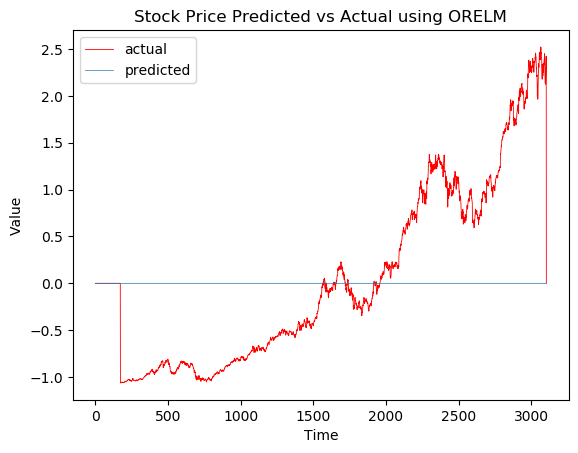

In [88]:
from matplotlib import pyplot as plt
targetPlot1, = plt.plot(targetInput1, label='actual', color='red',linewidth=0.6)
predictedPlot1, = plt.plot(predictedInput1, label='predicted',linewidth=0.5)
plt.legend(handles=[targetPlot1, predictedPlot1])
plt.title("Stock Price Predicted vs Actual using ORELM")
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()